## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__    
    
* __Step 3: Exploratory Data Analysis__
    
* __Step 4: Building Model__
    
* __How to Make a Submission?__
* __Guidelines for Final Submission__

### Step 1: Importing the Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
train = pd.read_csv("TRAIN.csv")
test = pd.read_csv("TEST_FINAL.csv")

In [3]:
train.shape,test.shape

((188340, 10), (22265, 8))

* __We have 188340 rows and 10 columns in Train set whereas Test set has 22265 rows and 8 columns.__

In [4]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
#ratio of null values
train.isnull().sum()/train.shape[0] *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

In [6]:
#ratio of null values
test.isnull().sum()/test.shape[0] *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
dtype: float64

* We have 0 missing values

In [7]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 4


In [8]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 2


### Step 3: Exploratory Data Analysis

In [9]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


## Sales

<AxesSubplot:xlabel='Sales'>

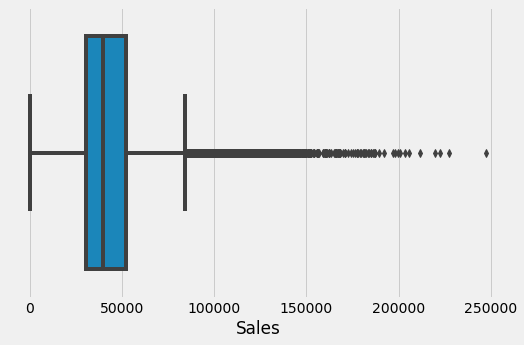

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot('Sales',data=train)

Text(0.5, 1.0, 'Sales Distribution')

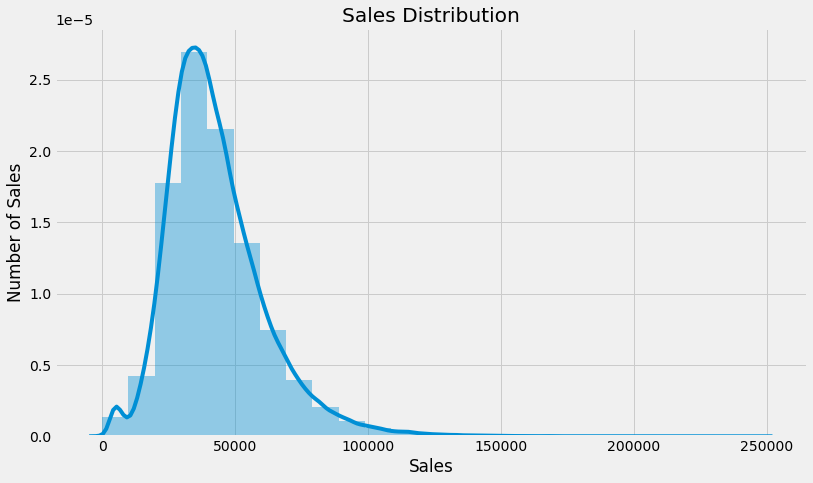

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Sales")
plt.ylabel("Number of Sales")
plt.title("Sales Distribution")


## Store id

In [17]:
#No. of unique store ids's 
print(train['Store_id'].value_counts())
print('******************************************')
print(test['Store_id'].nunique())

128    516
84     516
211    516
83     516
338    516
      ... 
168    516
40     516
295    516
167    516
255    516
Name: Store_id, Length: 365, dtype: int64
******************************************
365


 ## Store type

In [18]:
print(train['Store_Type'].value_counts())
print('******************************************')
print(test['Store_Type'].value_counts())

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64
******************************************
S1    10492
S4     5429
S2     3416
S3     2928
Name: Store_Type, dtype: int64


<AxesSubplot:xlabel='Store_Type', ylabel='count'>

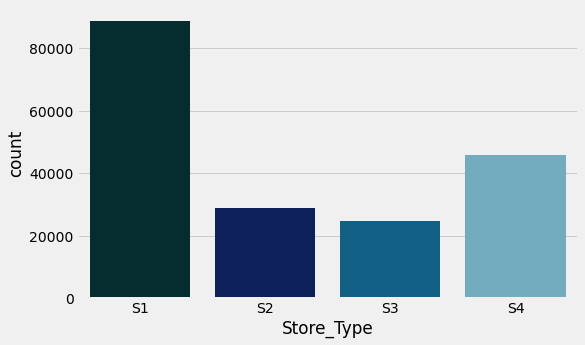

In [19]:
plt.figure(figsize=(8,5))
sns.countplot('Store_Type',data=train,palette='ocean', order=['S1','S2','S3','S4'])

__As we can see there are more sales data for store s1 than any other stores  .__

<AxesSubplot:xlabel='Store_Type', ylabel='Sales'>

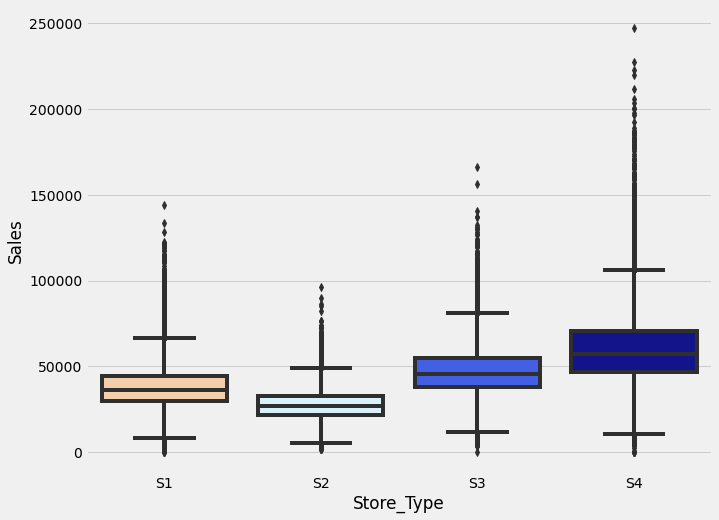

In [20]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='Store_Type',data=train,palette='flag', order=['S1','S2','S3','S4'])

__As we can see there are more sales generated from store s4 followed by store s3 .Also s4 seem to have a long tail of costliers orders.__

## Location Type

In [21]:
print(train['Location_Type'].value_counts())
print('******************************************')
print(test['Location_Type'].value_counts())

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64
******************************************
L1    10065
L2     5734
L3     3538
L5     1647
L4     1281
Name: Location_Type, dtype: int64


<AxesSubplot:xlabel='Location_Type', ylabel='count'>

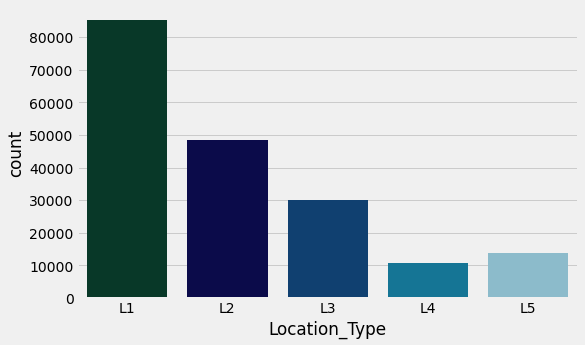

In [22]:
plt.figure(figsize=(8,5))
sns.countplot('Location_Type',data=train,palette='ocean', order=['L1','L2','L3','L4','L5'])

<AxesSubplot:xlabel='Location_Type', ylabel='Sales'>

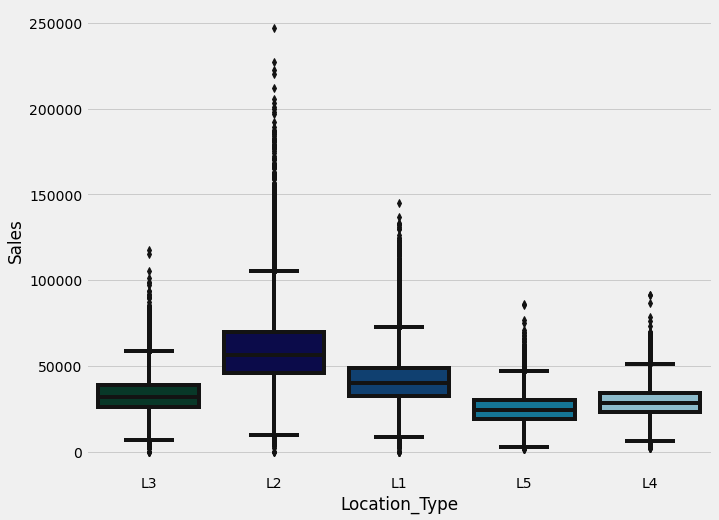

In [23]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='Location_Type',data=train,palette='ocean')

__As we can see there are more sales generated from store L1 and 0 sales from L2 .Also here L2 seem to have a long tail of costly orders__

## Region code

In [24]:
print(train['Region_Code'].value_counts())
print('******************************************')
print(test['Region_Code'].value_counts())

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64
******************************************
R1    7564
R2    6405
R3    5246
R4    3050
Name: Region_Code, dtype: int64


<AxesSubplot:xlabel='Region_Code', ylabel='count'>

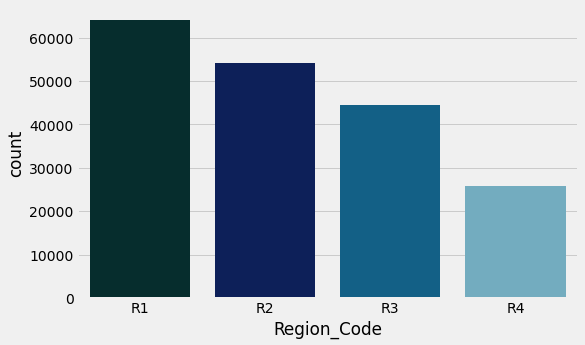

In [25]:
plt.figure(figsize=(8,5))
sns.countplot('Region_Code',data=train,palette='ocean', order=['R1','R2','R3','R4'])

<AxesSubplot:xlabel='Region_Code', ylabel='Sales'>

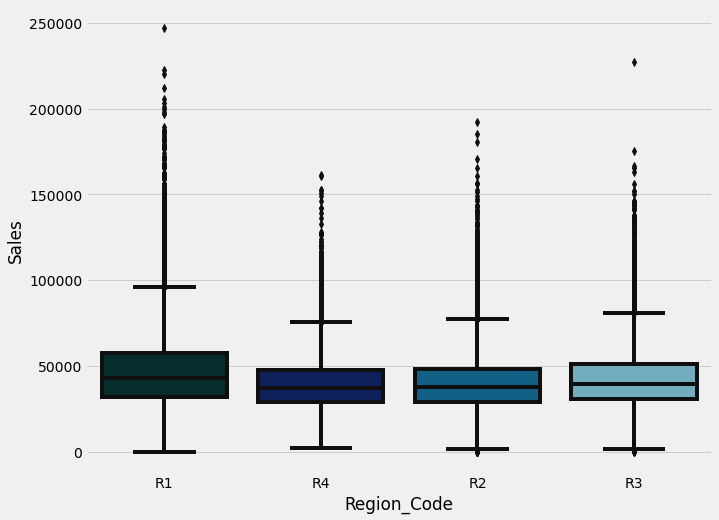

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(y='Sales',x='Region_Code',data=train,palette='ocean')

## Date

In [27]:
train['Date']

0         2018-01-01
1         2018-01-01
2         2018-01-01
3         2018-01-01
4         2018-01-01
             ...    
188335    2019-05-31
188336    2019-05-31
188337    2019-05-31
188338    2019-05-31
188339    2019-05-31
Name: Date, Length: 188340, dtype: object

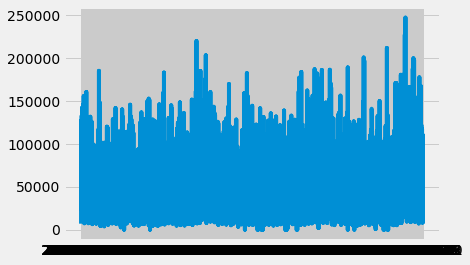

In [28]:
plt.plot(train['Date'], train['Sales'])


_As we can see there is an spike in sales for a particular date.So lets sort the sales by date_

## Top 10 sales dates

In [29]:
top_20_sales = train[['Sales', 'Date']].sort_values('Sales', ascending=False).nlargest(20, 'Sales')

<AxesSubplot:xlabel='Sales', ylabel='Date'>

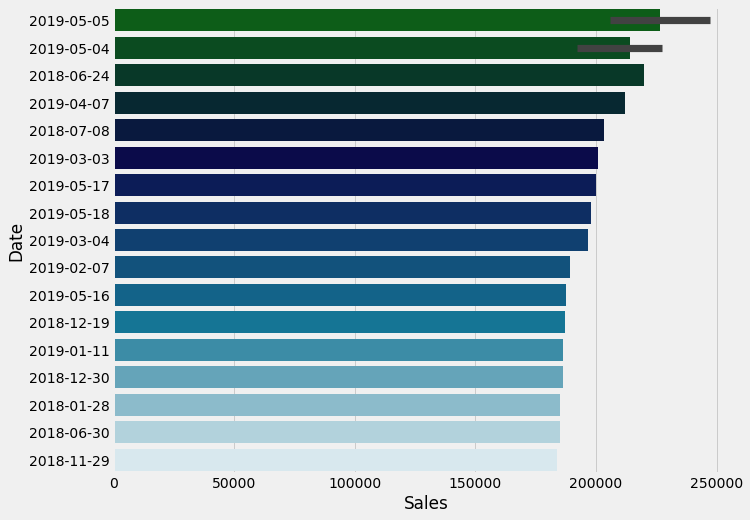

In [30]:
plt.figure(figsize=(10,8))
sns.barplot(x='Sales',y='Date',data=top_20_sales,palette='ocean')

## Holiday

In [31]:
train['Holiday'].value_counts()

0    163520
1     24820
Name: Holiday, dtype: int64

<AxesSubplot:xlabel='Holiday', ylabel='count'>

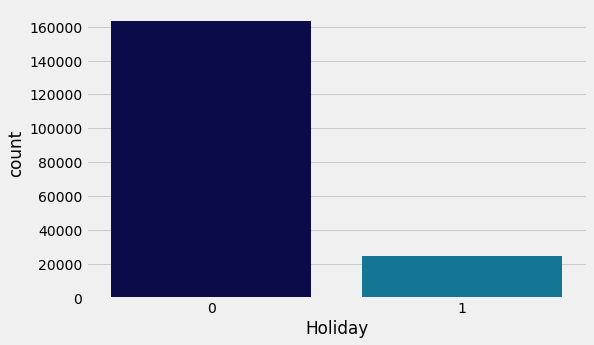

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Holiday',data=train,palette='ocean')

## Discount

In [33]:
train['Discount']

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
188335    Yes
188336     No
188337     No
188338    Yes
188339     No
Name: Discount, Length: 188340, dtype: object

<AxesSubplot:xlabel='Discount', ylabel='count'>

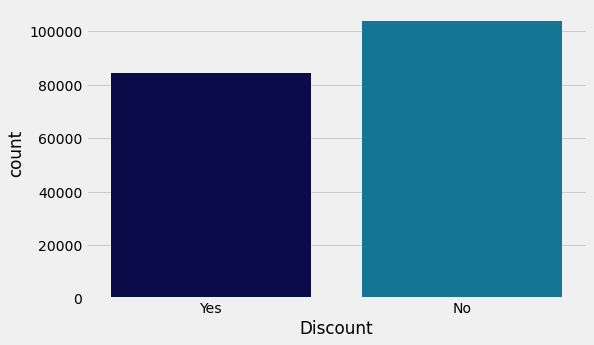

In [34]:
plt.figure(figsize=(8,5))
sns.countplot('Discount',data=train,palette='ocean')

## Orders

In [35]:
train['#Order']

0          9
1         60
2         42
3         23
4         62
          ..
188335    51
188336    90
188337    56
188338    70
188339    47
Name: #Order, Length: 188340, dtype: int64

## Sales vs Order

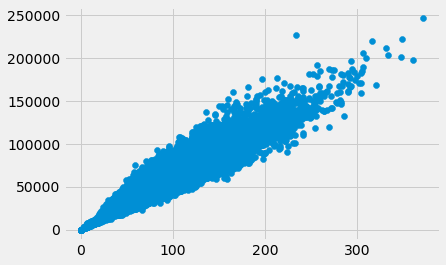

In [36]:
plt.scatter(train['#Order'],train['Sales'])

_As we can see there is clearly a linear relation ship between sales and date_

## Order vs date

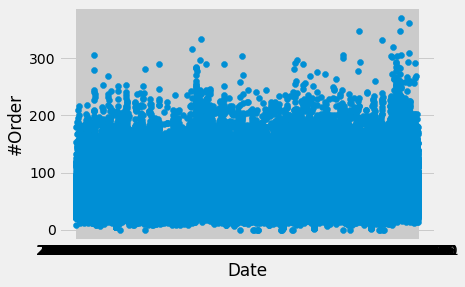

In [37]:
plt.scatter(train['Date'], train['#Order'])
plt.xlabel('Date')
plt.ylabel('#Order')
plt.show()

### Step 5: Building Model

In [38]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [39]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

* __Encoding the required columns from training and test dataset__

In [40]:
train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [ ]:
# Seperate Features and Target
X= train.drop(columns = ['Sales','#Order'], axis=1)
y= train['Sales']

In [ ]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

In [ ]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()


In [ ]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

* __Store type, Location_Type and Holiday are the most important attributes to determine Item_Outlet_Sales.__

__RMSE__

In [ ]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

* __Validation Set RMSE score is around 5416 from this linear model__

## New model

In [ ]:
# Seperate Features and Target
X= train.drop(columns = ['Sales','#Order','Discount'], axis=1)
y= train['Sales']

# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=22)

# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_valid)
coef = pd.Series(LR.coef_,features).sort_values()


In [ ]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

In [ ]:
MSE= metrics.mean_squared_error(y_valid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

In [ ]:
def lstm_model(train_data, test_data):
    # Call helper functions to create X & y and scale data
    X_train, y_train, X_test, y_test, scaler_object =    
        scale_data(train_data, test_data)
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    # Build LSTM
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], 
                                         X_train.shape[2]), 
                                         stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, 
              shuffle=False)
    predictions = model.predict(X_test, batch_size=1)
    # Call helper functions to undo scaling & create prediction df
    original_df = load_data('../data/monthly_data.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object, 
                            lstm=True)
    unscaled_df = predict_df(unscaled, original_df)
    # Call helper functions to print scores and plot results
    get_scores(unscaled_df, original_df, 'LSTM')
    plot_results(unscaled_df, original_df, 'LSTM')

In [ ]:
lstm_model(X,y)

## Submission

In [ ]:
submission = pd.read_csv('SAMPLE.csv')
final_predictions = LR.predict(test)
submission['Sales'] = final_predictions
#only positive predictions for the target variable
#submission['Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission.csv', index=False)